# 타이타닉 침몰 사고 데이터 분석


## 라이브러리 임포트


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 데이터 수집


### 데이터 불러오기


In [ ]:
df = pd.read_csv("../data/titanic.csv")  # CSV 파일 읽기
df.head()                                # 데이터프레임의 처음 5행 출력

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 데이터 살펴보기


In [3]:
df.head()   # 데이터프레임의 처음 5행 출력

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.tail()   # 데이터프레임의 마지막 5행 출력

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
df.info()   # 데이터프레임의 요약 정보 출력

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe()   # 데이터프레임의 통계 요약 정보 출력

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 데이터 정제


### 결측치 탐지 및 처리


In [7]:
df.isna().sum()  # 결측치 개수 확인

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df[df.isna().any(axis=1)]  # 결측치가 있는 행 출력

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [9]:
# 숫자형 컬럼 선택
numeric_cols = df.select_dtypes(include=['number']).columns

# 중앙값으로 결측치 채우기
for col in numeric_cols:
  median_val = df[col].median()
  df[col] = df[col].fillna(median_val)

# 또는 평균값으로 결측치 채우기
# for col in numeric_cols:
#   mean_val = df[col].mean()
#   df[col] = df[col].fillna(mean_val)

In [10]:
df[df.isna().any(axis=1)]  # 결측치가 있는 행 출력

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S


In [11]:
df = df.drop('Cabin', axis=1)   # 'Cabin' 컬럼 삭제

In [12]:
df[df.isna().any(axis=1)]  # 결측치가 있는 행 출력

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [13]:
df = df.drop([61, 829])  # 61번, 829번 행 삭제 (인덱스 번호 기준)

In [14]:
df[df.isna().any(axis=1)]  # 결측치가 있는 행 출력

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Embarked


## 데이터 모델링 및 분석


### 생존자 비율 시각화 (파이차트)


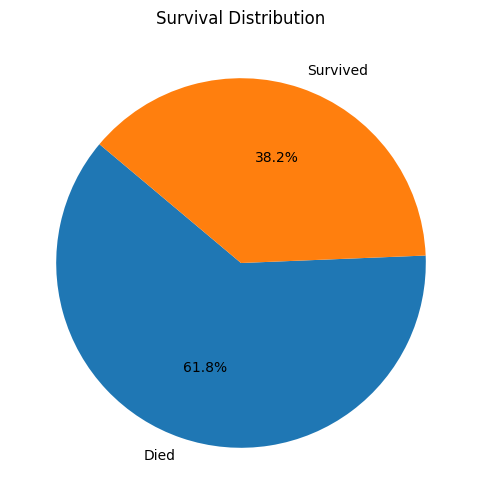

In [15]:
survived_counts = df['Survived'].value_counts()
labels = ['Died', 'Survived']

plt.figure(figsize=(6, 6))
plt.pie(survived_counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Survival Distribution')
plt.show()

### 성별에 따른 생존률 (막대그래프)


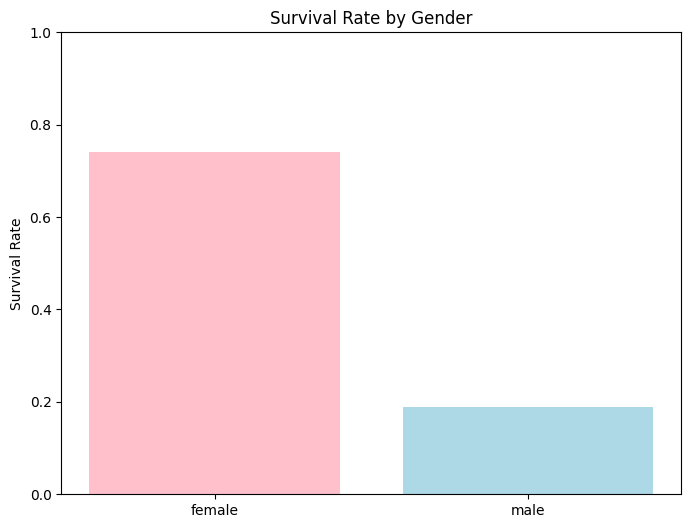

In [16]:
gender_survival = df.groupby('Gender')['Survived'].mean()

plt.figure(figsize=(8, 6))
plt.bar(gender_survival.index, gender_survival.values, color=['pink', 'lightblue'])
plt.title('Survival Rate by Gender')
plt.ylim(0, 1)
plt.ylabel('Survival Rate')
plt.show()

### 객실 등급에 따른 생존률 (막대그래프)


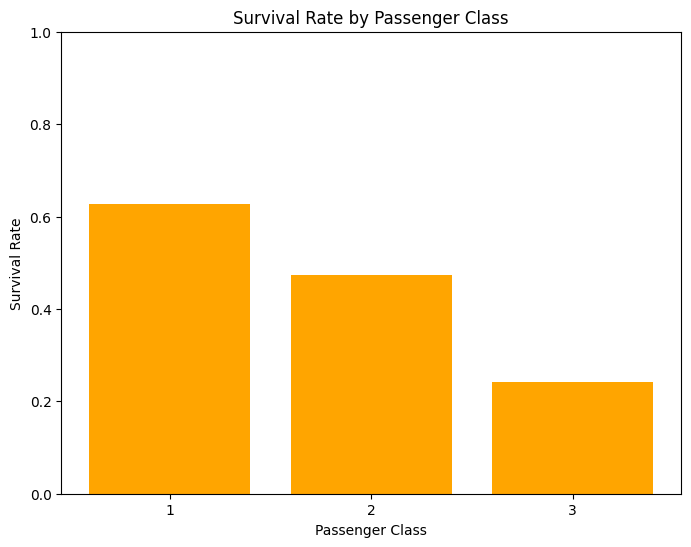

In [17]:
pclass_survival = df.groupby('Pclass')['Survived'].mean().sort_index()

plt.figure(figsize=(8, 6))
plt.bar(pclass_survival.index.astype(str), pclass_survival.values, color='orange')
plt.title('Survival Rate by Passenger Class')
plt.ylim(0, 1)
plt.ylabel('Survival Rate')
plt.xlabel('Passenger Class')
plt.show()

### 나이와 생존 여부에 따른 분포 (히스토그램)


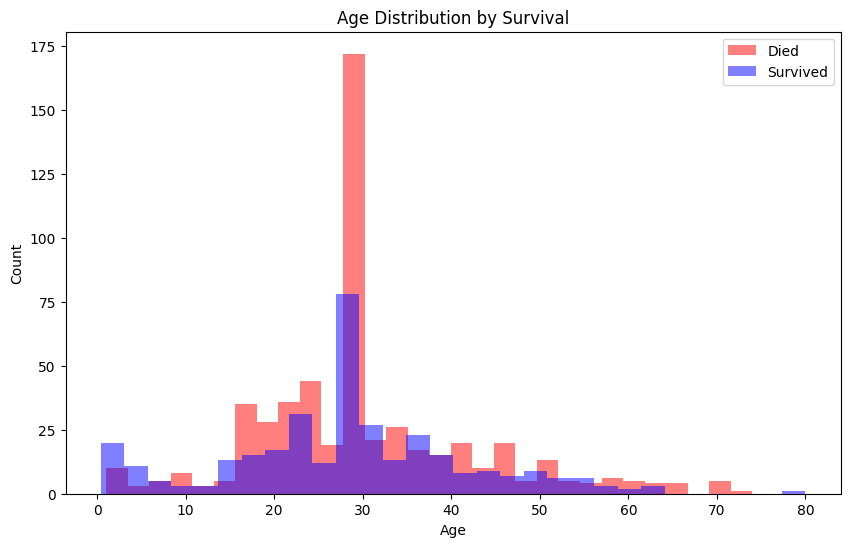

In [19]:
plt.figure(figsize=(10, 6))
plt.hist(df.loc[df['Survived'] == 0, 'Age'].dropna(), bins=30, alpha=0.5, label='Died', color='red')
plt.hist(df.loc[df['Survived'] == 1, 'Age'].dropna(), bins=30, alpha=0.5, label='Survived', color='blue')
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.show()

### 성별, 객실 등급에 따른 생존률 (다중 막대그래프)


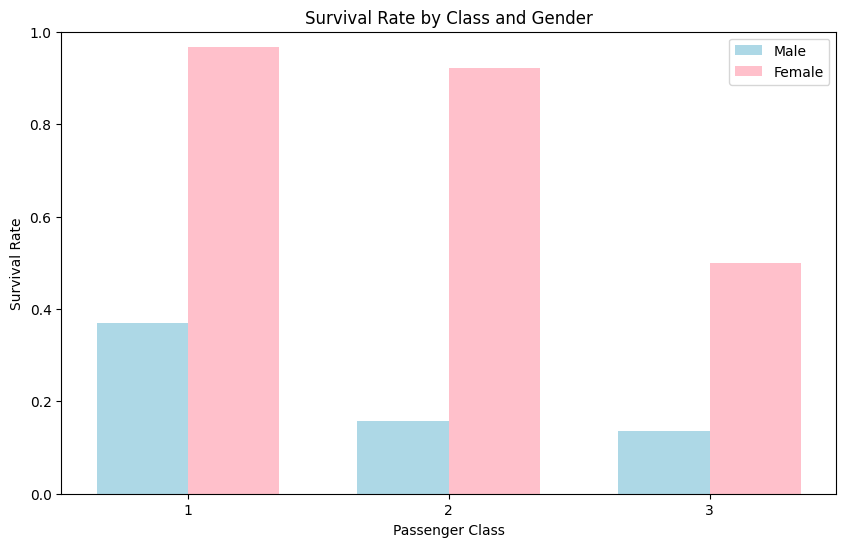

In [20]:
groups = df.groupby(['Pclass', 'Gender'])['Survived'].mean().unstack()

labels = groups.index.astype(str)
width = 0.35
x = np.arange(len(labels))

plt.figure(figsize=(10, 6))
plt.bar(x - width / 2, groups['male'], width, label='Male', color='lightblue')
plt.bar(x + width / 2, groups['female'], width, label='Female', color='pink')

plt.xticks(x, labels)
plt.ylim(0, 1)
plt.ylabel('Survival Rate')
plt.xlabel('Passenger Class')
plt.title('Survival Rate by Class and Gender')
plt.legend()
plt.show()